# Developing a visualization to monitor energy comsumption 

### Data for the project can be found in the UCI Machine Learning Repository located here:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

#### Data description (after clean-up)

1.date-time: Datetime in format yyyy-mm-dd hh:mm:ss 

2.global_active_power: household global minute-averaged active power (in kilowatt) 

3.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 

4.voltage: minute-averaged voltage (in volt) 

5.global_intensity: household global minute-averaged current intensity (in ampere) 

6.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 

7.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 

8.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [3]:
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
# Additional modules
import numpy as np
import pandas as pd
from datetime import datetime
import time
from datasci_prj.dayofweek import dayofweek #This function returns the day of week in text
from datasci_prj.monthofyear import monthofyear #This function returns the day of week in text

In [5]:
# Read the datasets and append
df1 = pd.read_csv('household_power_consumption_set_1.csv', 
                   sep=',',header=0,low_memory=False)
df2 = pd.read_csv('household_power_consumption_set_2.csv', 
                   sep=',',header=0,low_memory=False)
df3 = pd.read_csv('household_power_consumption_set_3.csv', 
                   sep=',',header=0,low_memory=False)
df = df1.append(df2.append(df3))
df = df.reset_index(drop=True)
df['Datetime']=pd.to_datetime(df['Datetime'])


In [6]:
entry1 = df.Datetime[0]
print 'The first entry of this dataset begins on'+\
      ' '+dayofweek(entry1.weekday())+', ' +\
          monthofyear(entry1.month)+' '+ str(entry1.day)+\
      ', '+str(entry1.year) 
print 'at', entry1.time()

The first entry of this dataset begins on Saturday, December 16, 2006
at 17:24:00


### Plot out one day's global active power usage

In [7]:
# This is on Christmas Day of 2006 
df4 = df[ (df['Datetime'] >= datetime(2006,12,26,0,0,0) ) 
        &  (df['Datetime'] < datetime(2006,12,27,0,0,0) ) ]

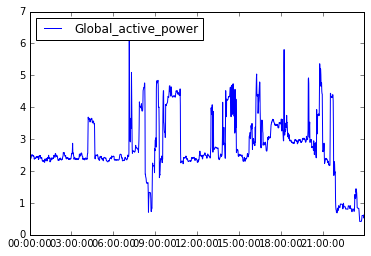

In [8]:
plt.plot(df4.Datetime.tolist(), df4.Global_active_power)
plt.legend(loc=2)

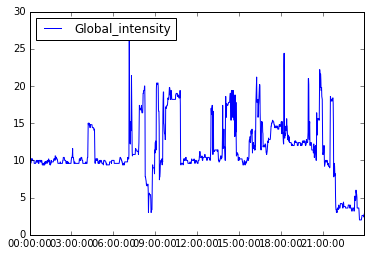

In [9]:
plt.plot(df4.Datetime.tolist(), df4.Global_intensity)
plt.legend(loc=2)

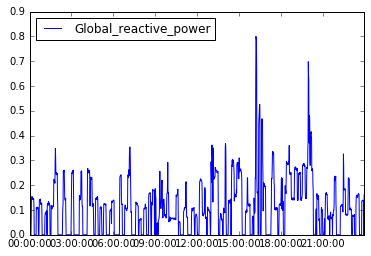

In [10]:
plt.plot(df4.Datetime.tolist(), df4.Global_reactive_power)
plt.legend(loc=2)

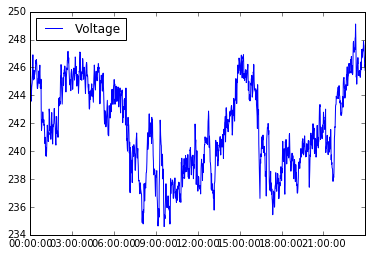

In [11]:
plt.plot(df4.Datetime.tolist(), df4.Voltage)
plt.legend(loc=2)

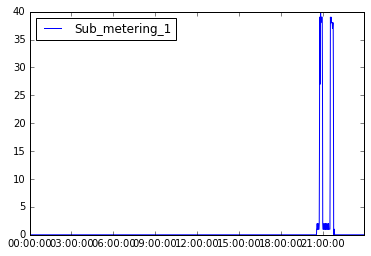

In [12]:
plt.plot(df4.Datetime.tolist(), df4.Sub_metering_1)
plt.legend(loc=2)

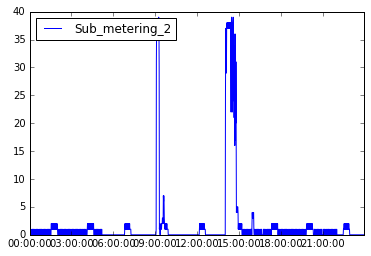

In [13]:
plt.plot(df4.Datetime.tolist(), df4.Sub_metering_2)
plt.legend(loc=2)

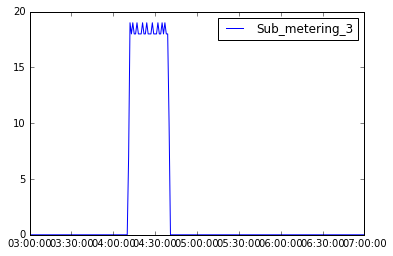

In [14]:
plt.plot(df4.Datetime.tolist(), df4.Sub_metering_3)
plt.xlim([datetime(2006,12,26,3,0),datetime(2006,12,26,7,0)])
plt.legend(loc=1)

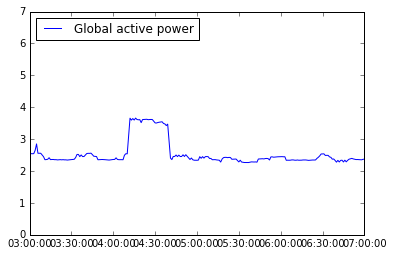

In [15]:
# Power = V * I = Global active power confirmed
G_A_P = df4.Global_intensity*df4.Voltage/1000. # in kilowatts
plt.plot(df4.Datetime.tolist(), G_A_P, label='Global active power')
plt.xlim([datetime(2006,12,26,3,0),datetime(2006,12,26,7,0)])
plt.legend(loc=2)

### Comparison of year by year performance for Christmas Eve - Boxing Day energy usage

In [18]:
df_24_26_2006 = df[ (df['Datetime'] >= datetime(2006,12,24,0,0,0) ) 
        &  (df['Datetime'] < datetime(2006,12,27,0,0,0) ) ]

df_24_26_2007 = df[ (df['Datetime'] >= datetime(2007,12,24,0,0,0) ) 
        &  (df['Datetime'] < datetime(2007,12,27,0,0,0) ) ]

df_24_26_2008 = df[ (df['Datetime'] >= datetime(2008,12,24,0,0,0) ) 
        &  (df['Datetime'] < datetime(2008,12,27,0,0,0) ) ]

df_24_26_2009 = df[ (df['Datetime'] >= datetime(2009,12,24,0,0,0) ) 
        &  (df['Datetime'] < datetime(2009,12,27,0,0,0) ) ]



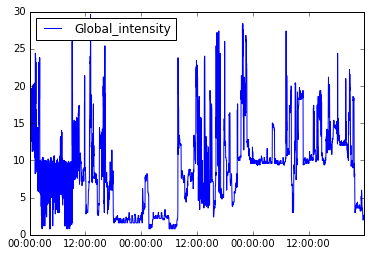

In [20]:
plt.plot(df_24_26_2006.Datetime.tolist(), df_24_26_2006.Global_intensity)
plt.legend(loc=2)

In [30]:
from statsmodels.nonparametric.smoothers_lowess import lowess
filtered_2006 = lowess(np.array(df_24_26_2006.Global_active_power.tolist()), np.linspace(0,1,len(df_24_26_2006)), is_sorted=True, frac=0.01, it=0)
filtered_2007 = lowess(np.array(df_24_26_2007.Global_active_power.tolist()), np.linspace(0,1,len(df_24_26_2007)), is_sorted=True, frac=0.01, it=0)
filtered_2008 = lowess(np.array(df_24_26_2008.Global_active_power.tolist()), np.linspace(0,1,len(df_24_26_2008)), is_sorted=True, frac=0.01, it=0)
filtered_2009 = lowess(np.array(df_24_26_2009.Global_active_power.tolist()), np.linspace(0,1,len(df_24_26_2009)), is_sorted=True, frac=0.01, it=0)

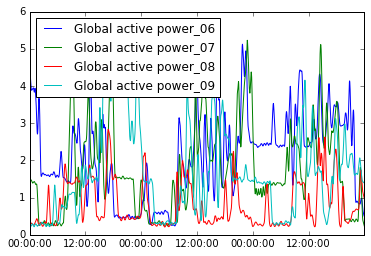

In [33]:
plt.plot(df_24_26_2006.Datetime.tolist(), filtered_2006[:,1],label='Global active power_06')
plt.plot(df_24_26_2006.Datetime.tolist(), filtered_2007[:,1],label='Global active power_07')
plt.plot(df_24_26_2006.Datetime.tolist(), filtered_2008[:,1],label='Global active power_08')
plt.plot(df_24_26_2006.Datetime.tolist(), filtered_2009[:,1],label='Global active power_09')


plt.legend(loc=2)